# Plastic Waste to Ocean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
plastic_waste_path = "plastic-pollution- Mismanaged plastic waste to ocean per capita (kg per year).csv"

In [3]:
plastic_waste = pd.read_csv(plastic_waste_path)


In [4]:
mismanaged_plastic = pd.DataFrame(plastic_waste)

In [5]:
mismanaged_plastic.rename(columns={'Mismanaged plastic waste to ocean per capita (kg per year)':'Plastics to Ocean (per capita)'},
                         inplace = True)
mismanaged_plastic

,Entity,Code,Year,Plastics to Ocean (per capita)
0,Africa,NaN,2019,0.059823
1,Albania,ALB,2019,0.543214
2,Algeria,DZA,2019,0.134114
3,Angola,AGO,2019,0.027023
4,Antigua and Barbuda,ATG,2019,0.020619
...,...,...,...,...
160,Vietnam,VNM,2019,0.292561
161,Western Sahara,ESH,2019,0.065292
162,World,OWID_WRL,2019,0.126980
163,Yemen,YEM,2019,0.008641


In [6]:
mismanaged_plastic_high = mismanaged_plastic.loc[mismanaged_plastic['Plastics to Ocean (per capita)']>=0.500000,
                                  ['Entity', 'Plastics to Ocean (per capita)']]

mismanaged_plastic_high.head()

,Entity,Plastics to Ocean (per capita)
1,Albania,0.543214
13,Belize,0.958974
36,Dominica,0.736111
37,Dominican Republic,0.584412
38,East Timor,0.552978


In [7]:
sorted_high = mismanaged_plastic_high.sort_values(['Plastics to Ocean (per capita)'], ascending = True)
sorted_high

,Entity,Plastics to Ocean (per capita)
83,Liberia,0.534333
1,Albania,0.543214
38,East Timor,0.552978
37,Dominican Republic,0.584412
62,Haiti,0.615200
126,Saint Vincent and the Grenadines,0.729730
36,Dominica,0.736111
73,Jamaica,0.791723
13,Belize,0.958974
56,Grenada,1.160714


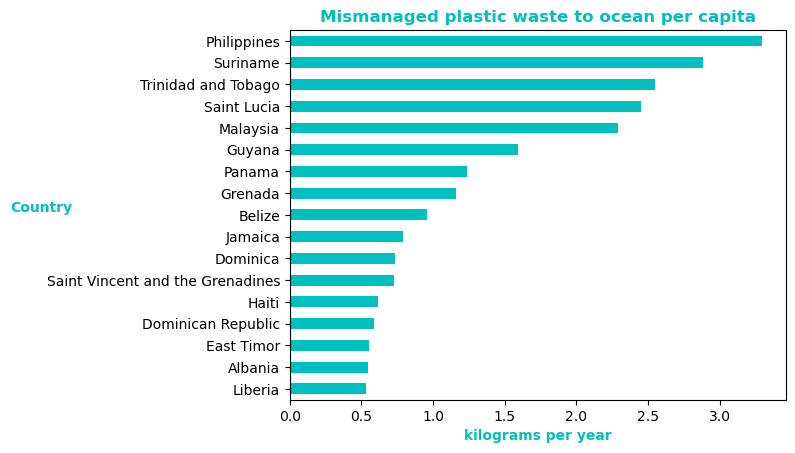

In [8]:
sorted_high.plot(x = 'Entity', y = 'Plastics to Ocean (per capita)', kind='barh', color='c', legend=False)
plt.title('Mismanaged plastic waste to ocean per capita',color= 'c', fontsize='large',fontweight='semibold')

plt.xlabel('kilograms per year',color= 'c',fontweight='semibold')
plt.ylabel('Country',rotation='horizontal',color= 'c',fontweight='semibold')

plt.show()


In [9]:
# Number of countries in study
countries = len(mismanaged_plastic['Entity'].unique())
countries

165

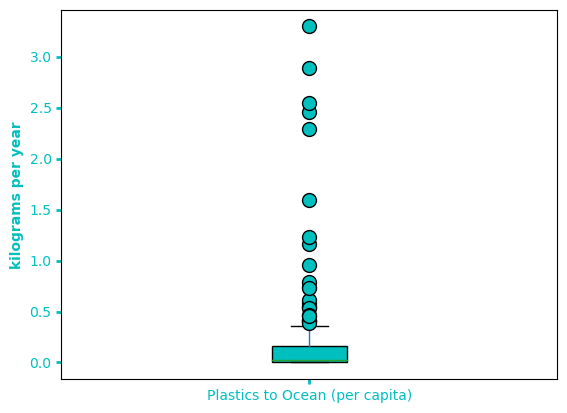

In [10]:
mismanaged_plastic.boxplot(grid = False,column='Plastics to Ocean (per capita)',
                           patch_artist= True,boxprops = dict(facecolor = 'c'),
                           flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'c'})
plt.ylabel('kilograms per year',color= 'c',fontweight='semibold')
plt.tick_params(colors='c', which='both', labelsize='medium', width=2)


# Marine Microplastics
mongoimport --type csv -d plastic_pollution -c ocean_plastics --headerline --drop MarineMicroplastics_oceanwater.csv
mongoimport --type csv -d plastic_pollution -c beach_plastics --headerline --drop MarineMicroplastics_beaches.csv

In [11]:
from pymongo import MongoClient
from pprint import pprint
import folium
import requests

In [12]:
microplastics_path = 'MarineMicroplastics_oceanwater.csv'

In [13]:
microplastics = pd.read_csv(microplastics_path)

In [14]:
mongo = MongoClient(port=27017)

In [15]:
[x for x in mongo.list_databases()]

[{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False},
 {'name': 'autosaurus', 'sizeOnDisk': 40960, 'empty': False},
 {'name': 'config', 'sizeOnDisk': 61440, 'empty': False},
 {'name': 'gardenDB', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'local', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'met', 'sizeOnDisk': 540672, 'empty': False},
 {'name': 'petsitly_marketing', 'sizeOnDisk': 57344, 'empty': False},
 {'name': 'plastic_pollution', 'sizeOnDisk': 4173824, 'empty': False},
 {'name': 'travel_db', 'sizeOnDisk': 81920, 'empty': False},
 {'name': 'uk_food', 'sizeOnDisk': 16334848, 'empty': False}]

In [16]:
plastic_ocean = mongo['plastic_pollution']

In [17]:
print(plastic_ocean.list_collection_names())

['ocean_plastics', 'beach_plastics']


In [18]:
pprint(plastic_ocean.ocean_plastics.find_one())

{'Accession Link': 'https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:275968',
 'Accession Number': 275968,
 'Beach Location': '',
 'Collecting Time (min)': '',
 'Country': '',
 'DOI': 'https://doi.org/10.1371/journal.pone.0111913',
 'Date': '2/3/2011 12:00:00 AM',
 'Density Class': 'Medium',
 'Density Range': '0.005-1',
 'FID': 118054,
 'GlobalID': '08810f2f-2e38-425c-a5b6-90d69b421c58',
 'Keywords': 'SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Amsterdam',
 'Latitude': -34.7158,
 'Long Reference': 'Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. Thiel, C.J. '
                   'Moore, J.C. Borerro, F. Galgani, P.G. Ryan, J. Reisser. '
                   '2014. Plastic Pollution in the World’s Oceans: More than 5 '
                   'Trillion Plastic Pieces Weighing over 250,000 Tons Afloat '
                   'at Sea. PLoS ONE 9(12): e111913. '
                   'doi:10.1371/journal.pone.0111913',
 'Longitude': -49.213,
 'Marine Setting': 'Ocean water',

In [19]:
print(plastic_ocean.list_collection_names())

['ocean_plastics', 'beach_plastics']


In [20]:
pprint(plastic_ocean.beach_plastics.find_one())

{'Accession Link': 'https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0278270',
 'Accession Number': 278270,
 'Beach Location': 'Novillero',
 'Collecting Time (min)': '',
 'Country': 'Mexico',
 'DOI': 'https://doi.org/10.1016/j.resconrec.2019.104633',
 'Date': '6/11/2018 12:00:00 AM',
 'Density Class': 'Medium',
 'Density Range': '500-30000',
 'FID': 121896,
 'GlobalID': 'fd69d820-2d58-4025-90ef-8dd44f333ee4',
 'Keywords': 'Mexico',
 'Latitude': 22.375112,
 'Long Reference': 'Alvarez-Zeferino, J.C., S. Ojeda-Benítez, A. A. '
                   'Cruz-Salas, C. Martínez-Salvador, A. Vázquez-Morillas. '
                   '2020. Microplastics in Mexican beaches. Resources, '
                   'Conservation and Recycling 155, 104633. '
                   'https://doi.org/10.1016/j.resconrec.2019.104633',
 'Longitude': -105.68474,
 'Marine Setting': 'Beach',
 'Measurement': 3526.093089,
 'Ocean Bottom Depth (m)': '',
 'Oceans': 'Pacific Ocean',
 'Organization'

In [26]:
m = folium.Map(location=(0, 0), zoom_start= 2)
ocean_pollution = pd.read_csv("MarineMicroplastics_oceanwater.csv")

folium.Map(tiles="https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png", 
           attr="Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA))")
folium.circleMarker()
m

In [33]:
m